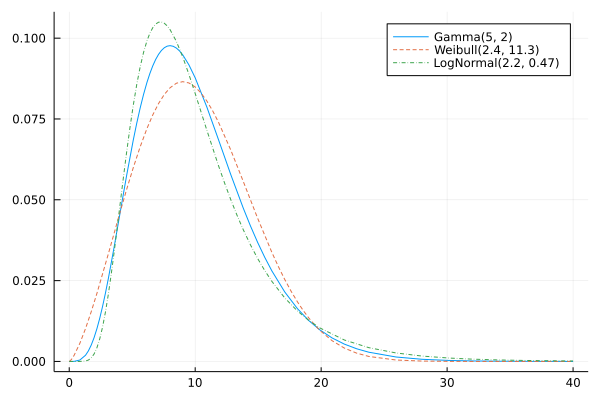

In [1]:
using Distributions, StatsPlots

function aic(model, Y)
    mle = fit_mle(model, Y)
    -2loglikelihood(mle, Y) + 2length(params(mle))
end

function simulate_model_selections(models, truedist, samplesize; niters = 10^4)
    selectedmodel = Vector{Int}(undef, niters)
    Threads.@threads for i in 1:niters
        Y = rand(truedist, samplesize)
        selectedmodel[i] = argmin(aic(model, Y) for model in models)
    end
    nselected = zeros(Int, 3)
    for i in 1:niters
        nselected[selectedmodel[i]] += 1
    end
    [model => nselected[i]/niters for (i, model) in enumerate(models)]
end

models = (Gamma, Weibull, LogNormal)

a, b = 0, 40
plot(Gamma(5, 2), a, b; label="Gamma(5, 2)")
plot!(Weibull(2.4, 11.3), a, b; label="Weibull(2.4, 11.3)", ls=:dash)
plot!(LogNormal(2.2, 0.47), a, b; label="LogNormal(2.2, 0.47)", ls=:dashdot)

In [2]:
simulate_model_selections(models, Gamma(5, 2), 100; niters = 10^4)

3-element Vector{Pair{UnionAll, Float64}}:
     Gamma => 0.6692
   Weibull => 0.1409
 LogNormal => 0.1899

In [3]:
simulate_model_selections(models, Weibull(2.4, 11.3), 100; niters = 10^4)

3-element Vector{Pair{UnionAll, Float64}}:
     Gamma => 0.1427
   Weibull => 0.856
 LogNormal => 0.0013

In [4]:
simulate_model_selections(models, LogNormal(2.2, 0.47), 100; niters = 10^4)

3-element Vector{Pair{UnionAll, Float64}}:
     Gamma => 0.1914
   Weibull => 0.0034
 LogNormal => 0.8052

Suppose the i.i.d. sample `Y` is fitted with models A, B, and C.

In order to determine which model's prediction is likely to be closer to the true (but unknown) distribution that generated the original sample `Y`, one of the standard prescriptions is to use the AIC.  Select the model with the smallest AIC.

Ref. https://en.wikipedia.org/wiki/Akaike_information_criterion

In the following example, models A, B, and C are respectively `Gamma`, `Weibull`, and `LogNormal`.  I have experimented with three true distributions `Gamma(5, 2)`, `Weibull(2.4, 11.3)`, and `LogNormal(2.2, 0.47)`.  These are similar each others.  Please look at the graph in the following example.

Results of a Monte Carlo simulation ($10^4$ iterations) with samples `Y` generated by `Gamma(5, 2)` of size 100:

```
     Gamma => 0.6692
   Weibull => 0.1409
 LogNormal => 0.1899
```

The percentage of the correct answer, `Gamma`, being selected is about 67 percent.

In the cases of `Weibull(2.4, 11.3)` and `LogNormal(2.2, 0.47)`, the percentages of the correct answers are about 86 percent and about 81 percent, respectively.

For details, see the following code and results.

```julia
using Distributions, StatsPlots

function aic(model, Y)
    mle = fit_mle(model, Y)
    -2loglikelihood(mle, Y) + 2length(params(mle))
end

function simulate_model_selections(models, truedist, samplesize; niters = 10^4)
    selectedmodel = Vector{Int}(undef, niters)
    Threads.@threads for i in 1:niters
        Y = rand(truedist, samplesize)
        selectedmodel[i] = argmin(aic(model, Y) for model in models)
    end
    nselected = zeros(Int, 3)
    for i in 1:niters
        nselected[selectedmodel[i]] += 1
    end
    [model => nselected[i]/niters for (i, model) in enumerate(models)]
end

models = (Gamma, Weibull, LogNormal)

a, b = 0, 40
plot(Gamma(5, 2), a, b; label="Gamma(5, 2)")
plot!(Weibull(2.4, 11.3), a, b; label="Weibull(2.4, 11.3)", ls=:dash)
plot!(LogNormal(2.2, 0.47), a, b; label="LogNormal(2.2, 0.47)", ls=:dashdot)
```

![2021-07-13|688x462](upload://bBPbwGrrY352MpZSROkggsdKc71.png)

```julia
simulate_model_selections(models, Gamma(5, 2), 100; niters = 10^4)
```
```
3-element Vector{Pair{UnionAll, Float64}}:
     Gamma => 0.6692
   Weibull => 0.1409
 LogNormal => 0.1899
```

```julia
simulate_model_selections(models, Weibull(2.4, 11.3), 100; niters = 10^4)
```
```
3-element Vector{Pair{UnionAll, Float64}}:
     Gamma => 0.1427
   Weibull => 0.856
 LogNormal => 0.0013
```

```julia
simulate_model_selections(models, LogNormal(2.2, 0.47), 100; niters = 10^4)
```
```
3-element Vector{Pair{UnionAll, Float64}}:
     Gamma => 0.1914
   Weibull => 0.0034
 LogNormal => 0.8052
```